In [8]:
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm

import numpy as np
from astropy.io import fits

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 20}	
rc('font', **font)

In [3]:
## file can be downloaded from: https://www.sdss4.org/dr17/irspec/spectro_data/ 

file = '/Users/ankearentsen/Documents/Werk/Otherdata/allStarLite-dr17-synspec_rev1.fits'
data = fits.getdata(file,1)

In [6]:
## Quality cuts (do try plotting without [some of] these to see what happens)

wgood = np.where( (data['SNR'] > 100) 
                 & (data['ASPCAPFLAG'] == 0)
                 & (data['FE_H_ERR'] < 0.2)
                 & (data['FE_H'] > -10)
                 & (data['MG_FE'] > -10)
                 & (data['PROGRAMNAME'] != 'magclouds')    # remove stars from the Magellanic Clouds
                 & (data['PROGRAMNAME'] != 'cluster_gc')   # remove most stars from globular clusters
             )[0]

good = data[wgood]


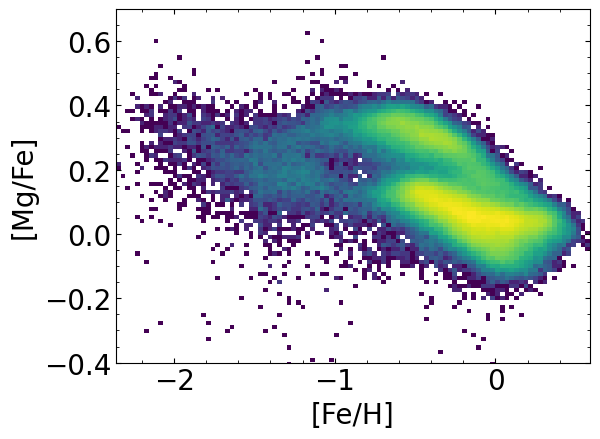

In [9]:
plt.hist2d(good['FE_H'], good['MG_FE'], bins=100, rasterized=True, 
           norm=LogNorm())
plt.ylim(-0.4, 0.7)
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')

for axi in [plt.gca()]:
        axi.xaxis.set_ticks_position('both')
        axi.yaxis.set_ticks_position('both')
        axi.minorticks_on()
        axi.tick_params(axis='both',direction='in', which='both')

plt.tight_layout()
plt.savefig('figures/apogee_feh-mgfe.pdf', dpi=150)
plt.show()

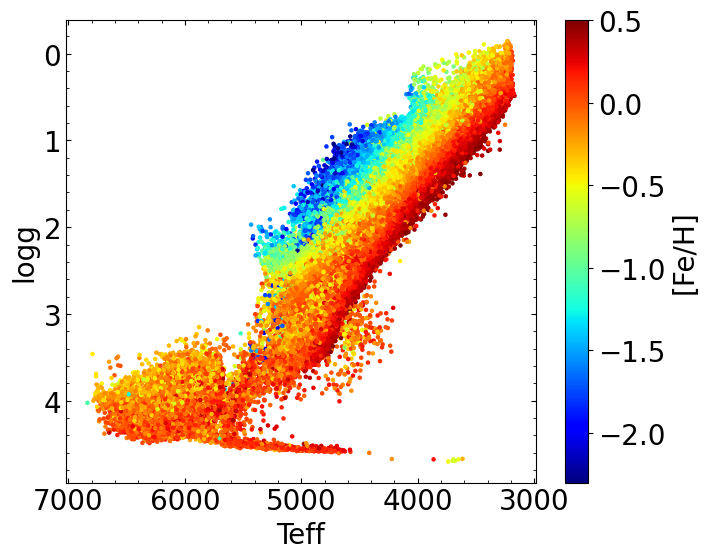

In [10]:
plt.figure(figsize=(7.5,6))
plt.scatter(good['TEFF'], good['LOGG'], c=good['FE_H'], vmin=-2.3, vmax=0.5, s=5, cmap='jet',
            rasterized=True)
plt.colorbar(label='[Fe/H]')
plt.xlabel('Teff')
plt.ylabel('logg')

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

for axi in [plt.gca()]:
        axi.xaxis.set_ticks_position('both')
        axi.yaxis.set_ticks_position('both')
        axi.minorticks_on()
        axi.tick_params(axis='both',direction='in', which='both')

plt.tight_layout()
plt.savefig('figures/apogee_kiel.pdf', dpi=150)
plt.show()